In [1]:
import pickle 
import pprint as pp
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import svm
import matplotlib.pyplot as plt

In [1]:
#This program loads the train and test data sets and runs the baseline OLS regression and runs out of sample testing

In [37]:
#Load Test and Train Data
train = pd.read_csv('Holger_train.csv', index_col = 0)
test = pd.read_csv('Holger_test.csv', index_col = 0)
test

,trial,monsex,newcit,nocounts,judgeid,malejudge,judge_yearsonbench,demean_logsenttot,year1,year2,...,cr13,cr14,cr15,cr16,cr17,cr18,cr19,cr20,cr21,cr22
12,0.0,1.0,0.0,1.0,"CARTER, GENE",1.0,20.0,-3.707210,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,1.0,"SINGAL, GEORGE Z.",1.0,3.0,-0.273222,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,1.0,0.0,0.0,1.0,"CARTER, GENE",1.0,20.0,1.996573,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,0.0,0.0,0.0,1.0,"SINGAL, GEORGE Z.",1.0,3.0,0.281775,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,0.0,0.0,0.0,1.0,"CARTER, GENE",1.0,20.0,0.335842,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53,0.0,0.0,0.0,1.0,"CARTER, GENE",1.0,20.0,-0.306012,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,0.0,0.0,0.0,1.0,"WOODCOCK, JOHN A., JR.",1.0,1.0,-0.024940,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,0.0,1.0,0.0,1.0,"SINGAL, GEORGE Z.",1.0,4.0,-3.204243,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
104,0.0,1.0,1.0,1.0,"WOODCOCK, JOHN A., JR.",1.0,1.0,-0.026189,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,0.0,0.0,0.0,3.0,"WOODCOCK, JOHN A., JR.",1.0,1.0,0.938892,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
X_train = train.drop(['judgeid', 'demean_logsenttot', 'year4', 'race1', 'cr22'], axis = 1)
X_train['intercept'] = 1
Y_train = train['demean_logsenttot']
X_test = test.drop(['judgeid', 'demean_logsenttot', 'year4', 'race1', 'cr22'], axis = 1)
X_test['intercept'] = 1
Y_test = test['demean_logsenttot']

In [35]:
regr = linear_model.LinearRegression(fit_intercept = False)
regr.fit(X_train, Y_train)
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - Y_test) ** 2))
regr.get_params

Coefficients: 
 [  6.65170148e-01  -5.53902905e-01   2.38215439e-03   3.15398464e-02
  -3.88464992e-03  -1.22996026e-03  -2.16231821e-03   3.90962862e-02
   1.32860009e-02   1.48020145e-02   2.23194769e-02   3.77882127e-02
   4.37635038e-02   6.09948792e-02   9.35729276e-02   2.16008272e-01
   1.20873849e-01  -1.46889204e-01   7.18820468e-02  -1.07182153e-01
  -1.61818171e-01  -1.22662969e+00  -9.92892261e-01  -2.44223524e+00
   1.32287062e-01  -4.08112604e-01  -5.36071647e-01  -1.05277875e+00
  -2.60894101e-01  -1.50038116e+00   3.12006102e-01  -1.67870958e+00
   5.37073919e-03  -1.08553437e+00  -9.35827324e-01  -5.94762816e-01
  -4.49811575e-01  -2.57545802e-01   5.00379618e-01   1.38668288e-01
   3.71076278e-01  -1.23505486e+00  -1.17369992e+00  -2.06136821e-02]
Mean squared error: 1.10


<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)>

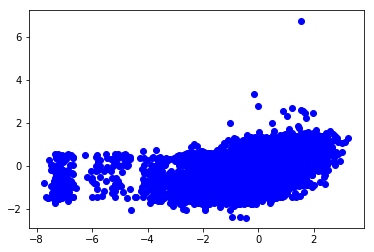

In [16]:
plt.scatter(Y_test, regr.predict(X_test), color='blue')
plt.show()